In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import pickle
import keras
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape, Dropout
from keras.models import Model
from keras import backend as K
from keras.models import model_from_json
from keras import optimizers
from keras import losses
from keras.layers.normalization import BatchNormalization
from PIL import Image,ImageOps

H:\SETUPS\Anaconda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
H:\SETUPS\Anaconda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
H:\SETUPS\Anaconda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
H:\SETUPS\Anaconda\envs\deeplearning\lib\site-packages\tensorflow\pyth

# DataSet

In [3]:
class DataSet:
    data_train = None;
    data_test  = None;
    
    # 30935 total
    total_train = 28152;
    total_test  =  2783;
       
    
    def read_pickle(self, name, show=False):
        
        if show:
            print('Loading pickle dataset:',"{}.pickle".format(name));
        pic = pickle.load(open("{}.pickle".format(name), "rb"));
        
        X = np.array(pic['X']);   
        Y = np.array(pic['Y']);
        
        if show:
           print('X-',X.shape)
           print('Y-',Y.shape)        
                
        return X,Y;
                         
        
    def load_dataset(self):
        self.data_train = dict(X=[],Y=[]);
        self.data_test  = dict(X=[],Y=[]);
        
        for i in range(1,4):
            x,y = self.read_pickle('train_v4_{}'.format(i), show=True);
            self.data_train['X'].extend(x);
            self.data_train['Y'].extend(y);
        
        x,y = self.read_pickle('test_v4', show=True);
        self.data_test['X'].extend(x);
        self.data_test['Y'].extend(y);
           
        
        
        self.data_train['X'] = np.array(self.data_train['X']);        
        self.data_train['Y'] = np.array(self.data_train['Y']);
                
        self.data_test['X'] = np.array(self.data_test['X']);
        self.data_test['Y'] = np.array(self.data_test['Y']);     
       
        
        
        
        print('\nTotal Train Data X:',self.data_train['X'].shape,'Y:',self.data_train['Y'].shape);
        print('Total Test  Data X:',self.data_test['X'].shape,'Y:',self.data_test['Y'].shape);  
        
        
    def normalize_images(self):
        
        print('\nNormalizing')
        train_x = [];
        test_x = [];
        
        for i in range(self.data_train['X'].shape[0]):
            train_x.append(self.data_train['X'][i] / 255);
            
        for i in range(self.data_test['X'].shape[0]):
            test_x.append(self.data_test['X'][i] / 255)
            
        self.data_train['X'] = np.array(train_x);
        self.data_test['X'] = np.array(test_x);
          
        
        print('Total Train Data X:',self.data_train['X'].shape,'Y:',self.data_train['Y'].shape);
        print('Total Test  Data X:',self.data_test['X'].shape,'Y:',self.data_test['Y'].shape);    
        

        

In [4]:
# load Dataset
ds = DataSet();
ds.load_dataset();

Loading pickle dataset: train_v4_1.pickle
X- (9000, 208, 208, 1)
Y- (9000, 5)
Loading pickle dataset: train_v4_2.pickle
X- (9000, 208, 208, 1)
Y- (9000, 5)
Loading pickle dataset: train_v4_3.pickle
X- (10152, 208, 208, 1)
Y- (10152, 5)
Loading pickle dataset: test_v4.pickle
X- (2783, 208, 208, 1)
Y- (2783, 5)

Total Train Data X: (28152, 208, 208, 1) Y: (28152, 5)
Total Test  Data X: (2783, 208, 208, 1) Y: (2783, 5)


In [5]:

ds.normalize_images();
#print('\n',ds.data_train['X'][0][0][0])


Normalizing
Total Train Data X: (28152, 208, 208, 1) Y: (28152, 5)
Total Test  Data X: (2783, 208, 208, 1) Y: (2783, 5)


Y [0.72222222 0.60194175 0.57943925 0.50549451 0.59375   ]


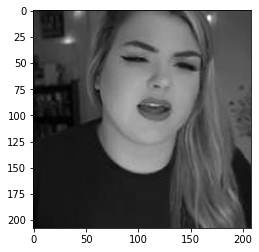

Y [0.66666667 0.51456311 0.44859813 0.65934066 0.54166667]


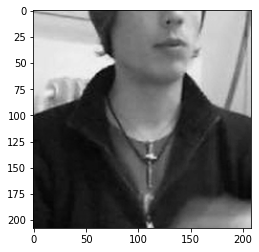

Y [0.51111111 0.3592233  0.3364486  0.41758242 0.27083333]


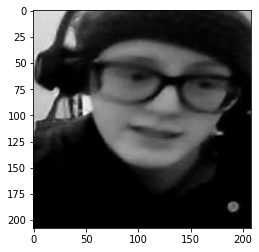

Y [0.32222222 0.18446602 0.18691589 0.17582418 0.13541667]


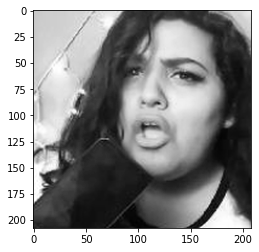

Y [0.34444444 0.37864078 0.22429907 0.37362637 0.40625   ]


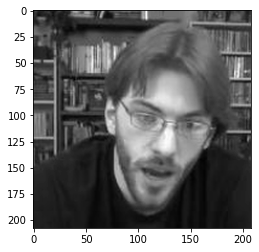

Y [0.26666667 0.33980583 0.30841121 0.42857143 0.34375   ]


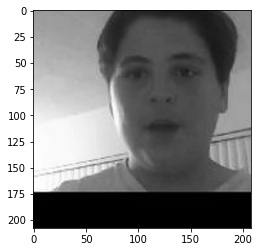

Y [0.73333333 0.69902913 0.69158879 0.73626374 0.6875    ]


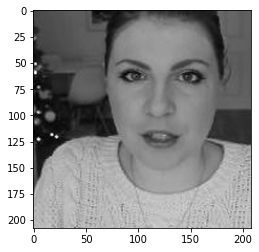

Y [0.72222222 0.69902913 0.72897196 0.71428571 0.67708333]


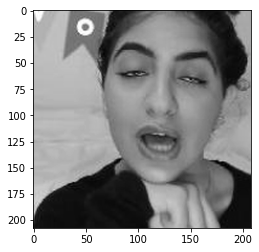

Y [0.8        0.85436893 0.68224299 0.52747253 0.72916667]


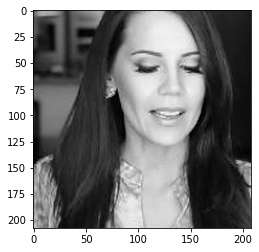

Y [0.67777778 0.6407767  0.53271028 0.61538462 0.44791667]


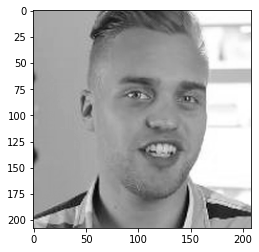

Y [0.52222222 0.5631068  0.42056075 0.45054945 0.58333333]


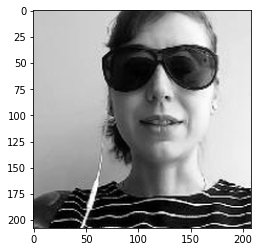

Y [0.66666667 0.39805825 0.58878505 0.42857143 0.70833333]


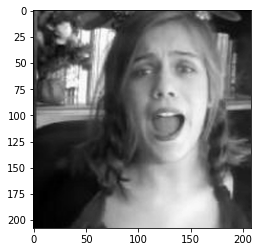

Y [0.63333333 0.60194175 0.5046729  0.74725275 0.52083333]


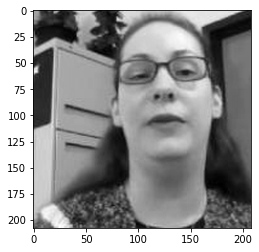

Y [0.88888889 0.68932039 0.70093458 0.61538462 0.77083333]


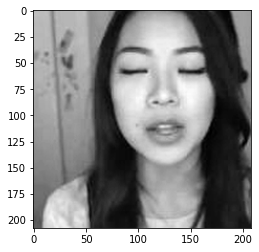

Y [0.48888889 0.50485437 0.55140187 0.51648352 0.44791667]


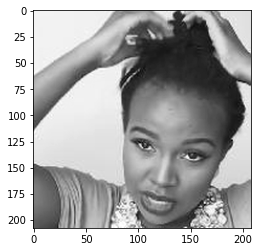

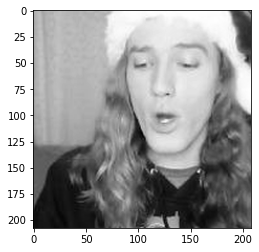

Y [0.8        0.54368932 0.64485981 0.45054945 0.69791667]
Y [0.33333333 0.59223301 0.35514019 0.2967033  0.4375    ]


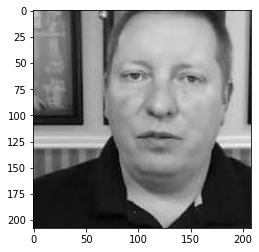

Y [0.45555556 0.40776699 0.38317757 0.47252747 0.41666667]


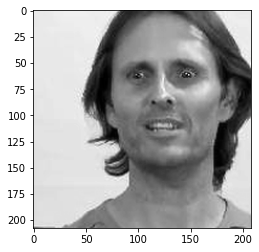

Y [0.45555556 0.4368932  0.41121495 0.46153846 0.53125   ]


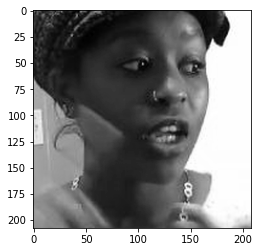

Y [0.62222222 0.63106796 0.62616822 0.59340659 0.60416667]


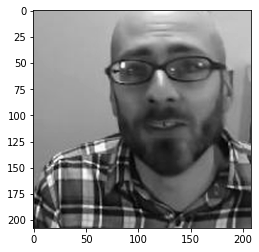

Y [0.47777778 0.38834951 0.36448598 0.42857143 0.32291667]


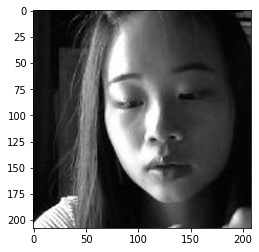

Y [0.42222222 0.68932039 0.22429907 0.62637363 0.4375    ]


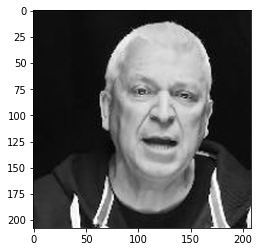

Y [0.64444444 0.45631068 0.51401869 0.56043956 0.5       ]


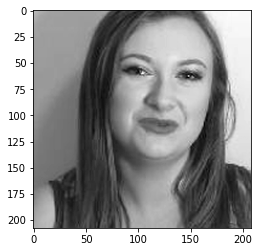

Y [0.6        0.38834951 0.60747664 0.51648352 0.54166667]


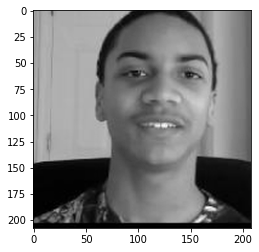

Y [0.33333333 0.33009709 0.40186916 0.46153846 0.3125    ]


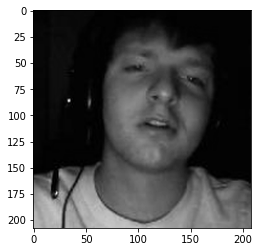

Y [0.51111111 0.58252427 0.34579439 0.57142857 0.22916667]


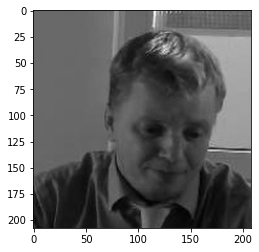

Y [0.36666667 0.22330097 0.29906542 0.32967033 0.27083333]


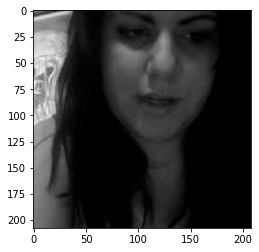

Y [0.61111111 0.58252427 0.40186916 0.68131868 0.5625    ]


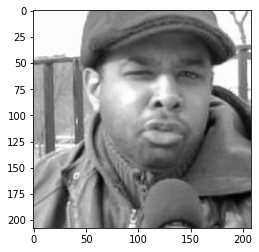

Y [0.46666667 0.37864078 0.4953271  0.41758242 0.41666667]


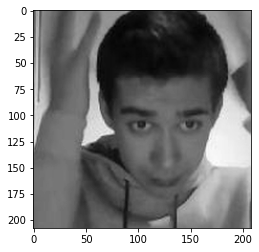

Y [0.42222222 0.40776699 0.42056075 0.54945055 0.28125   ]


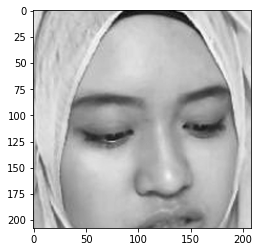

In [6]:
for i in range(0,10):
    print('Y',ds.data_test['Y'][i])
    plt.imshow(ds.data_test['X'][i].reshape(208,208), cmap='gray')
    plt.show();
    
for i in range(0,20):
    print('Y',ds.data_train['Y'][i])
    plt.imshow(ds.data_train['X'][i].reshape(208,208), cmap='gray')
    plt.show();

    

# Model and Training

In [7]:
def save_model(index=0):
    name = 'facemodel';
    model_json = classifier.to_json()
    with open("{}_{}.json".format(name, index), "w") as json_file:
        json_file.write(model_json)
    classifier.save_weights("{}_{}.h5".format(name,index),)
    print("Model saved to disk","{}_{}.h5".format(name,index))

In [13]:
input_img = Input(shape=(208,208,1,))

fm_size = 16;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)



em_size = math.ceil(208/(2**8));


x = Dropout(0.8)(x)

#Fully connected layer
x = Reshape((em_size*em_size*fm_size,),input_shape=(em_size,em_size,fm_size))(x)
x=Dense(500,activation='relu', input_shape=(em_size*em_size*fm_size,))(x)
x=Dense(500,activation='relu')(x)
x=Dense(100,activation='relu')(x)
output=Dense(5)(x)


adam = optimizers.adam(lr=1e-3)
classifier = Model(input_img, output)
classifier.compile(optimizer=adam, loss=losses.mse)
# classifier.compile(optimizer=adam, loss=my_loss)

classifier.summary();

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 208, 208, 1)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 208, 208, 16)      160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 104, 104, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 104, 104, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 52, 52, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 26, 26, 64)        0   

In [14]:
save = 1;

In [18]:
global_history = {'val_loss':[], 'loss':[], 'mean_acc':[]}
best_acc = 0;

In [20]:
def test_regresor_per_factor(index=0, show=False):
    # Test as regressor
    tolerance_i = 0.1;
    X = ds.data_test['X'];
    Y = ds.data_test['Y'];
    out = classifier.predict(X)

    acc = 0;
    diff = 0;
    for i in range(out.shape[0]):         
        diff = diff + (1 - abs(Y[i][index]-out[i][index]));

    acc = diff / (out.shape[0] * 1);
    acc = acc *100;
    
    if show:
        print('Acc Cal',acc);
    acc1 = acc;


    acc = 0;
    diff = 0;
    for i in range(out.shape[0]):  
        diff = abs(Y[i][index]-out[i][index]); 

        if diff<=tolerance_i:
            acc = acc + 1;

    acc = acc / (out.shape[0] * 1);
    acc = acc *100;

    if show:
        print('Acc with tol',acc);   
    
    return (acc1,acc);

def get_global_evaluation(show=False):

    avg_cl = 0;
    avg_to = 0;
    
    if show:
        print('O');
    (a1,a2) = test_regresor_per_factor(index=0, show=show);
    avg_cl += a1;
    avg_to += a2;

    if show:
        print('\nC');
    (a1,a2) = test_regresor_per_factor(index=1, show=show);
    avg_cl += a1;
    avg_to += a2;

    if show:
        print('\nE');
    (a1,a2) = test_regresor_per_factor(index=2, show=show);
    avg_cl += a1;
    avg_to += a2;

    if show:
        print('\nA');
    (a1,a2) = test_regresor_per_factor(index=3, show=show);
    avg_cl += a1;
    avg_to += a2;

    if show:
        print('\nN');
    (a1,a2) = test_regresor_per_factor(index=4, show=show);
    avg_cl += a1;
    avg_to += a2;

    avg_cl = avg_cl/5;
    avg_to = avg_to/5;

    if show:
        print('Average Accuracy',avg_cl)
        print('Tolerence', avg_to)
        
    return avg_cl;

get_global_evaluation(show=True)

O
Acc Cal 85.49559729320207
Acc with tol 39.23823212360762

C
Acc Cal 85.55706835097067
Acc with tol 40.783327344592166

E
Acc Cal 86.521438192546
Acc with tol 43.15486884656845

A
Acc Cal 87.4528701876774
Acc with tol 45.74200503054258

N
Acc Cal 86.5186700372302
Acc with tol 43.65792310456342
Average Accuracy 86.30912881232527
Tolerence 42.51527128997485


86.30912881232527

In [21]:
for i in range(0,10):
    h =classifier.fit(ds.data_train['X'], ds.data_train['Y'],
            epochs=1,
            batch_size=100,
            shuffle=False,
            validation_data=(ds.data_test['X'], ds.data_test['Y']))

    global_history['val_loss'].extend(h.history['val_loss'])
    global_history['loss'].extend(h.history['loss'])
    
    mean_acc = get_global_evaluation();
    global_history['mean_acc'].append(mean_acc);
    
    print('Mean-acc:',mean_acc)
    
    if mean_acc > best_acc:
        best_acc = mean_acc;
        save_model(index=save);


Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 4173s 148ms/step - loss: 0.0218 - val_loss: 0.0234
Mean-acc: 87.58518078306915
Model saved to disk cnn2b_train_1.h5
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 4061s 144ms/step - loss: 0.0202 - val_loss: 0.0205
Mean-acc: 88.37314890373153
Model saved to disk cnn2b_train_1.h5
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 4067s 144ms/step - loss: 0.0191 - val_loss: 0.0199
Mean-acc: 88.59051462211657
Model saved to disk cnn2b_train_1.h5
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 4062s 144ms/step - loss: 0.0183 - val_loss: 0.0190
Mean-acc: 88.85078949764969
Model saved to disk cnn2b_train_1.h5
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 4034s 

KeyboardInterrupt: 

In [23]:
classifier.load_weights("facemodel.h5")
print("Disc loaded model ")

Disc loaded model 


In [24]:
print(max(global_history['mean_acc']))

88.85078949764969


In [25]:
print(global_history['mean_acc'])

[87.58518078306915, 88.37314890373153, 88.59051462211657, 88.85078949764969, 88.66424748279442, 88.69236508526852, 88.45679164389689, 88.30405544388897, 88.26907018217386]


# Model Testing

In [2]:
model = tf.keras.models.load_model('facemodel.h5')

In [6]:
new_image= plt.imread("Nou.jpg")
from skimage.transform import resize
new_image_resized= resize(new_image, (128,128,1))

In [7]:
pred=model.predict(np.array([new_image_resized,]))
print(pred)

[[0.56044906 0.2804255  0.00291118 0.01577555 0.14043872]]


In [8]:
c = list(pred[0])
print(max(c))
c = c.index(max(c))

if c == 0:
    print("O")
if c == 1:
    print("C")
if c == 2:
    print("E")
if c == 3:
    print("A")
if c == 4:
    print("N")


0.56044906
O
